<a href="https://colab.research.google.com/github/priyentech/COMPUTER_VISION/blob/main/Copy_of_Brain_tumor_PRIYEN_RAJA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


data = []
paths = []
result = []

encoder = OneHotEncoder()
encoder.fit([[0], [1]])


for r, d, f in os.walk(r'/content/drive/My Drive/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

paths = []


for r, d, f in os.walk(r"/content/drive/My Drive/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(2891, 128, 128, 3)

In [ ]:
print(f'Total number of images we have: {len(data)}')

Total number of images we have: 2891


In [ ]:
result = np.array(result)
result = result.reshape(2891,2)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)
print(f'Number of images in training data: {len(x_train)}')
print(f'Number of images in testing data: {len(x_test)}')

Number of images in training data: 2312
Number of images in testing data: 579


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [ ]:
y_train.shape

(2312, 2)

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - loss: 8.8450 - val_loss: 0.7373
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.9685 - val_loss: 0.3458
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.2520 - val_loss: 0.1977
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.1396 - val_loss: 0.1721
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0716 - val_loss: 0.1447
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0594 - val_loss: 0.1577
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0559 - val_loss: 0.1326
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0391 - val_loss: 0.1588
Epoch 9/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0378 - val_loss: 0.1532
Epoch 10/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0362 - val_loss: 0.1255
Epoch 11/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0207 - val_loss: 0.1421
Epoch 12/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0

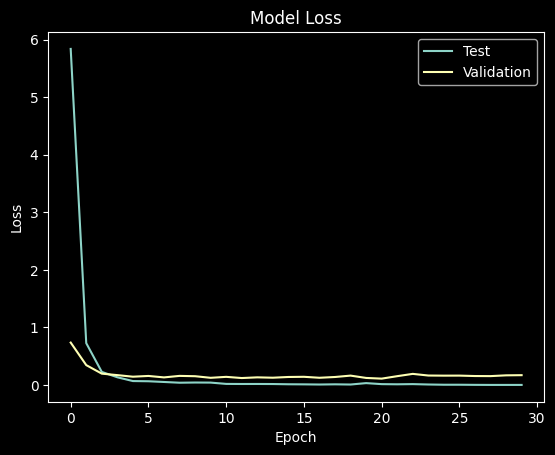

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


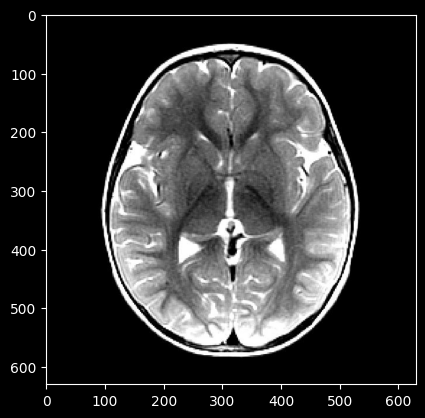

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/My Drive/no/no0.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


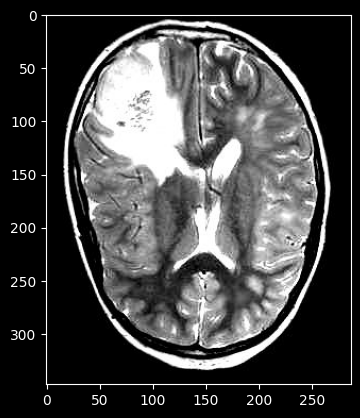

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/My Drive/yes/y0.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [ ]:
!pip install gradio



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 138.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.5 MB/s eta 0:00:00


In [ ]:
import gradio as gr

In [ ]:

heading_title = "Priyen  brain tumor classification app"

In [ ]:

num_examples = 2

example_path_1:  /content/drive/My Drive/yes/y0.jpg
example_path_2:  /content/drive/My Drive/no/no0.jpg


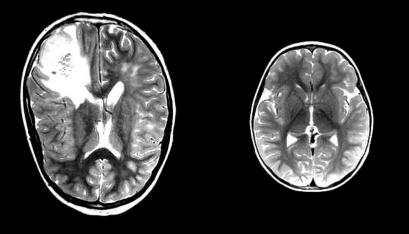

In [ ]:
#@title Enter the paths for the example images that you want displayed in your app by default. The user can use these images to quickly and easily test the model. Note: You can get the path for the file from the left sidebar. Simply run the code below, select the image file you want to include from its folder, right-click and select 'Copy path'. Then paste the path in the input box displayed:
from matplotlib import pyplot as plt
from PIL import Image

examples=[]
for i in range(num_examples):
  example_path = input(f"example_path_{i+1}:  ")
  examples.append(example_path)


rows = 1
plt.figure(figsize=(16, 8))
for num, x in enumerate(examples):
    img = Image.open(x)
    plt.subplot(rows,6,num+1)

    plt.axis('off')
    plt.imshow(img)


In [ ]:
#@title You can also add some description and explanation to your app's interace if you want. Go ahead and specify some text for the description and the long description (if you want to):
desc = "Brain tumor app. Let's learn!" # @param {type:"string"}
long_desc = "Select an image or upload one to predict if brain tumor is present or not" # @param {type:"string"}

In [ ]:
import gradio as gr

#@title Select a Theme for Gradio Interface:
theme_selection = "Glass" # @param ["Base", "Default", "Glass", "Monochrome", "Soft"]

theme_dict = {
    "Base": gr.themes.Base(),
    "Default": gr.themes.Default(),
    "Glass": gr.themes.Glass(),
    "Monochrome": gr.themes.Monochrome(),
    "Soft": gr.themes.Soft()
}


selected_theme = theme_dict[theme_selection]


def recognize_image(image):

    img = Image.fromarray(image).resize((128, 128))

    x = np.array(img)

    x = x.reshape(1, 128, 128, 3)


    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]


    class_names = ['No Tumor', 'Tumor']
    result = f"{names(classification)}"

    return result


image = gr.Image()
label = gr.Label()


iface = gr.Interface(
    fn=recognize_image,
    inputs=image,
    outputs=label,
    examples=examples,
    title=heading_title,
    description=desc,
    article=long_desc,
    theme=selected_theme
)

iface.launch(share=True, debug=True)




Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://74b895fb47442da1d5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
